<a href="https://colab.research.google.com/github/dFarrulla/flightprice-analysis/blob/main/flightprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Previsão de preços de passagens utilizando regressão linear.

Vamos seguir os seguintes passos:






**Carregar e visualizar os dados**: Analisar os datasets para entender a

estrutura e as variáveis disponíveis.






**Preparação dos dado**s: Limpar e transformar os dados conforme necessário, selecionando as variáveis relevantes.






**Divisão dos dado**s: Separar os dados em conjuntos de treinamento e teste.






**Treinamento do modelo**: Utilizar a regressão linear para treinar o modelo com os dados de treinamento.






**Avaliação do modelo**: Avaliar a performance do modelo utilizando os dados de teste.





**Previsão**: Fazer previsões utilizando o modelo treinado.





**A variável PRICE é nosso alvo, e quermos utiliza-la para prever com nossos modelos de regressão linear.**



In [ ]:
# Importação das bibliotecas necessárias para análise de dados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

Carregando e visualizando os dados

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregamento dos dados de um arquivo CSV contendo informações sobre preços de passagens aéreas
df = pd.read_csv('/content/drive/MyDrive/flight_price_dataset/Clean_Dataset.csv')

#Import PC Pedro
#df = pd.read_csv('/content/Clean_Dataset.csv')



In [ ]:
# Exibição das primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Verificação de valores nulos nas colunas do DataFrame
# Importante para identificar e tratar dados ausentes
print(df.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [ ]:
# Remoção de linhas com valores nulos, se necessário
#df = df.dropna()

# Verificação dos tipos de dados para garantir que estão corretos
print(df.dtypes)



Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [ ]:
# Descrição estatística básica dos dados para entender a distribuição e variabilidade
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [ ]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [ ]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [ ]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [ ]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [ ]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

class é uma palavra chave do Python.


Nesse caso como temos apenas duas classes elas podem ser transformadas em 0 e 1.

In [ ]:
# S Renomeando a coluna class por ser uma palavra restrita do python
df.rename(columns={'class': 'classe_passagem'}, inplace=True)
df['classe_passagem'].value_counts()

classe_passagem
Economy     206666
Business     93487
Name: count, dtype: int64

Com a contagem de valores o resultado não gera nenhuma informação utilizável então achamos melhor utilizar min, max e média.

In [ ]:
df['duration'].min()

0.83

In [ ]:
df['duration'].max()

49.83

In [ ]:
df['duration'].median()

11.25

Pré-processamento


---


Operações de limpeza e transformação de dados em df usando pandas.
Remover a coluna 'Unnamed: 0' e 'flight'.

O parâmetro `axis=1` indica que a operação é feita em uma coluna (se fosse `axis=0`, seria em uma linha). 2.

A função lambda transforma a coluna classe_passagem de um DataFrame Pandas em valores binários, onde 'Business' é mapeado para 1 e qualquer outro valor é mapeado para 0. Isso é útil para converter dados categóricos em numéricos, facilitando a análise e o uso em modelos de machine learning.

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['flight'], axis=1)

df['classe_passagem'] = df['classe_passagem'].apply(lambda x: 1 if x == 'Business' else 0)

In [ ]:

# Cria um objeto LabelEncoder
le = LabelEncoder()

# Itera sobre todas as colunas do DataFrame
for col in df.columns:
    if df[col].dtype == 'object':  # Verifica se a coluna é do tipo string
        df[col] = le.fit_transform(df[col])  # Converte a coluna para número

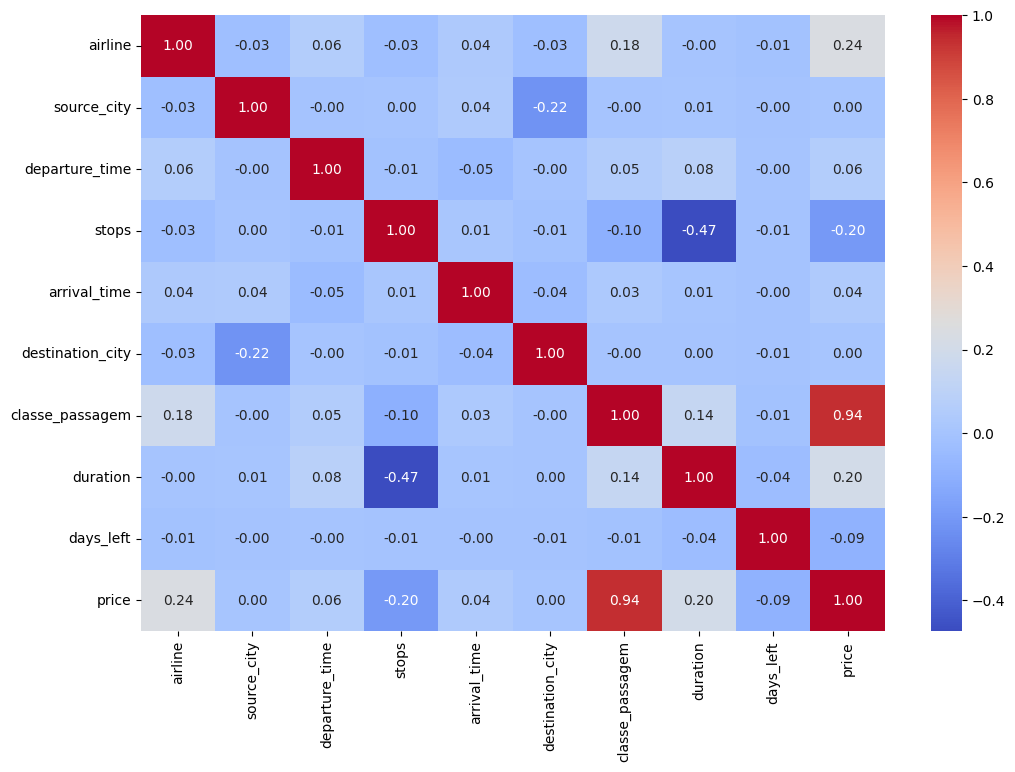

In [ ]:

correlacao_matrix = df.corr()
plt.figure(figsize=(12, 8))

# Plota o mapa de calor usando a matriz de correlação
sns.heatmap(correlacao_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostra o gráfico
plt.show()


<Axes: xlabel='days_left', ylabel='price'>

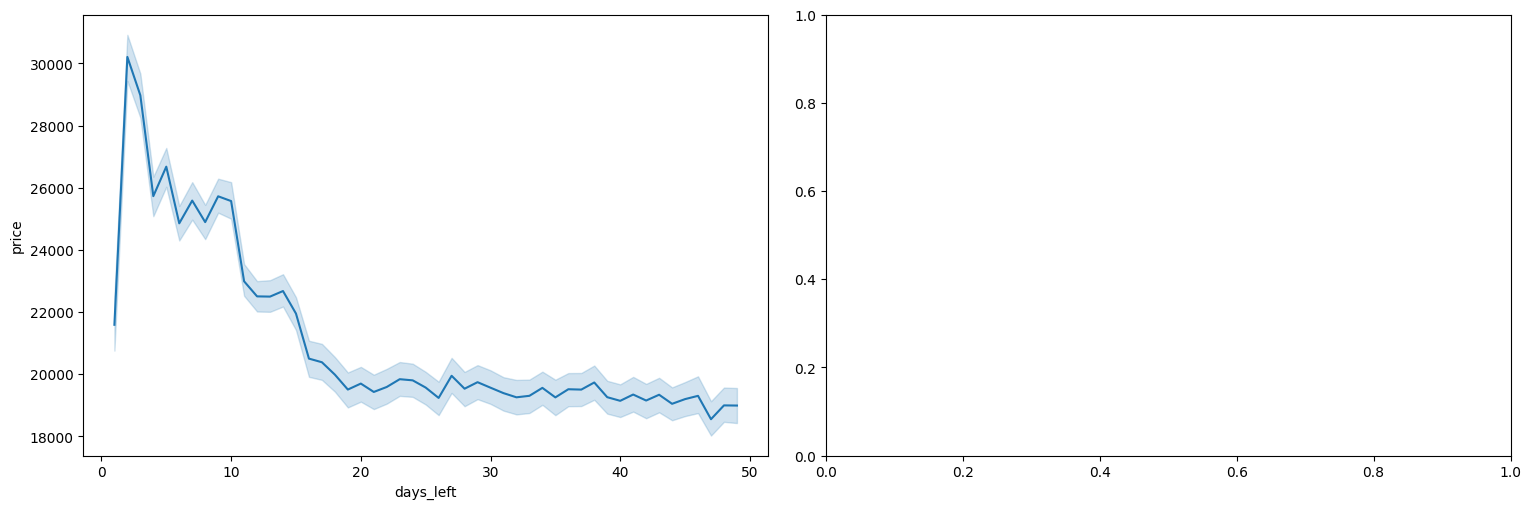

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Quanto mais cedo a pessoa faz reserva menor o valor da passagem
sns.lineplot(x='days_left', y='price', data=df, ax=ax[0])

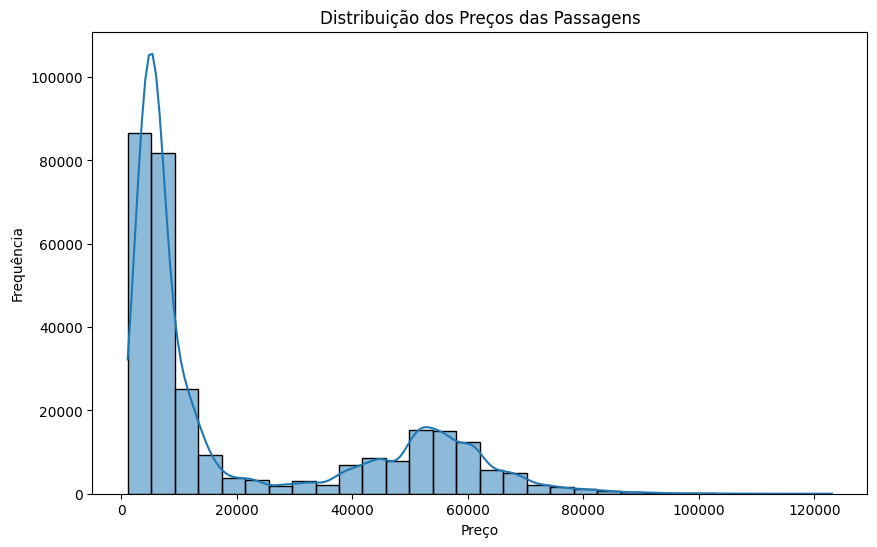

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição dos Preços das Passagens')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()



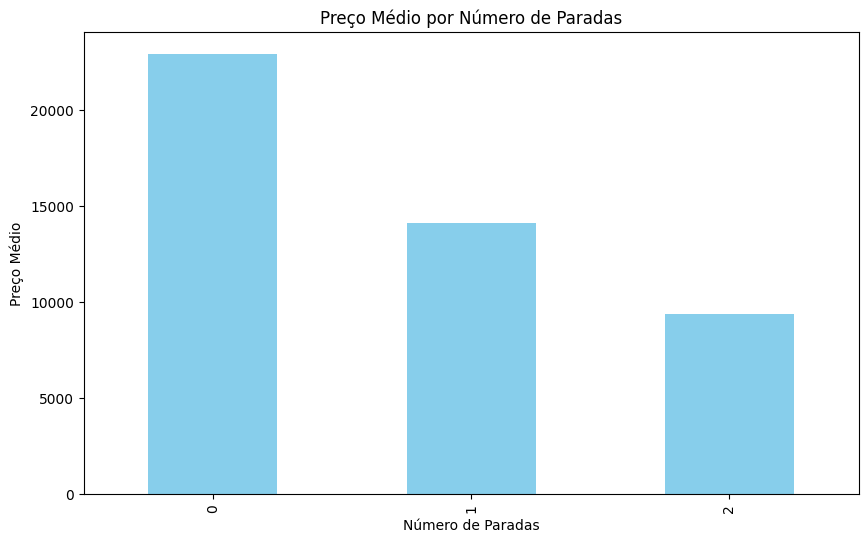

In [ ]:
preco_medio_por_paradas = df.groupby('stops')['price'].mean()
plt.figure(figsize=(10, 6))
preco_medio_por_paradas.plot(kind='bar', color='skyblue')
plt.title('Preço Médio por Número de Paradas')
plt.xlabel('Número de Paradas')
plt.ylabel('Preço Médio')
plt.show()


In [ ]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])
plt.xlabel('Características')
plt.ylabel('Importância')
plt.title('Importância das Características')
plt.show()


NameError: name 'reg' is not defined

In [ ]:


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar os resultados
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 49094571.16011867
R-squared: 0.9048879932165598


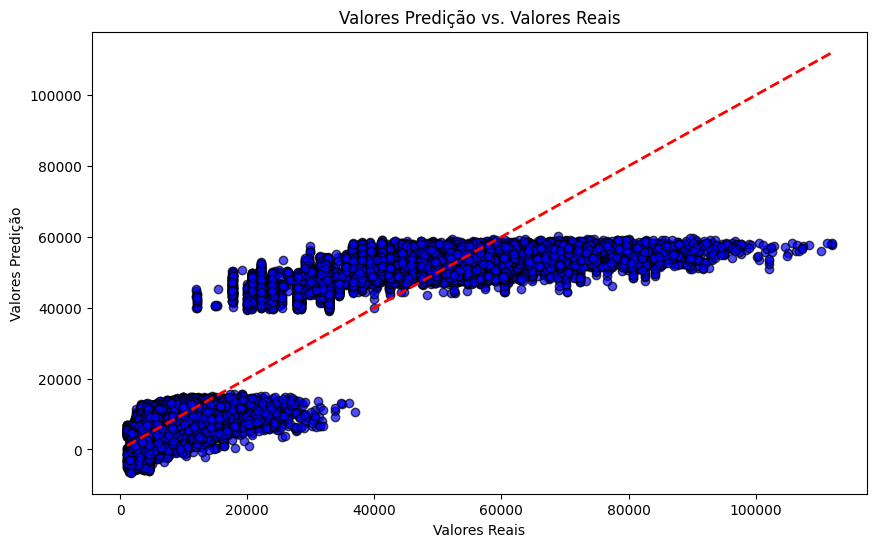

In [ ]:
# Conferindo o modelo graficamente

import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Plotando valores predicao vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Predição')
plt.title('Valores Predição vs. Valores Reais')
plt.show()

A função pd.factorize usada para converter valores categóricos em valores numéricos, criando códigos numéricos para cada valor único na coluna. A função retorna uma tupla com dois elementos:

Uma matriz de códigos numéricos.

Um índice dos valores únicos encontrados na coluna original.

 'df.stops = pd.factorize(df.stops)[0]' converte os valores categóricos da coluna stops em códigos numéricos, facilitando a análise.








In [ ]:
df.stops = pd.factorize(df.stops)[0]

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,classe_passagem,duration,days_left,price
0,4,2,2,0,5,5,0,2.17,1,5953
1,4,2,1,0,4,5,0,2.33,1,5953
2,0,2,1,0,1,5,0,2.17,1,5956
3,5,2,4,0,0,5,0,2.25,1,5955
4,5,2,4,0,4,5,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,1,2,3,1,10.08,49,69265
300149,5,1,0,1,5,3,1,10.42,49,77105
300150,5,1,1,1,5,3,1,13.83,49,79099
300151,5,1,1,1,2,3,1,10.00,49,81585


**pd.get_dummies(df.airline)** converte a coluna categórica airline em um conjunto de colunas binárias (dummies), onde cada coluna representa uma companhia aérea diferente e contém valores 0 ou 1, diminuindo a presença ou ausência daquela companhia aérea em cada linha do DataFrame original. Essa transformação é útil para preparar dados categóricos para algoritmos de aprendizado de máquina que requerem entradas numéricas.

In [ ]:
pd.get_dummies(df.airline).astype(int)

,0,1,2,3,4,5
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
300148,0,0,0,0,0,1
300149,0,0,0,0,0,1
300150,0,0,0,0,0,1
300151,0,0,0,0,0,1


In [ ]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source_city')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)


O parâmetro prefix='airline'adiciona o prefixo 'airline'aos nomes das novas colunas para indicar que elas se originaram da coluna airline.
df.join(...):


---


Esta função adiciona as colunas dummies geradas ao DataFrame original df.
A operação de join aqui está anexando as novas colunas binárias ao DataFrame df.


---


Esta função remove a coluna original airlinedo DataFrame df, pois ela foi subindo pelas colunas dummies.

In [ ]:
df


,stops,classe_passagem,duration,days_left,price,airline_0,airline_1,airline_2,airline_3,airline_4,...,arrival_2,arrival_3,arrival_4,arrival_5,departure_0,departure_1,departure_2,departure_3,departure_4,departure_5
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
# Converter todas as colunas em int

df = df.astype(int)


In [ ]:
df

,stops,classe_passagem,duration,days_left,price,airline_0,airline_1,airline_2,airline_3,airline_4,...,arrival_2,arrival_3,arrival_4,arrival_5,departure_0,departure_1,departure_2,departure_3,departure_4,departure_5
0,0,0,2,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Modelo de treinamento de regressão.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y =df.drop('price', axis=1), df.price


In [ ]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
reg.score(x_test, y_test)

0.9755158686921859

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(x_test)

print('R2:', r2_score(y_test, y_pred) )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9755158686921859
MAE: 1495.6306054876038
MSE: 12621135.672910837
RMSE: 3552.6237730599673


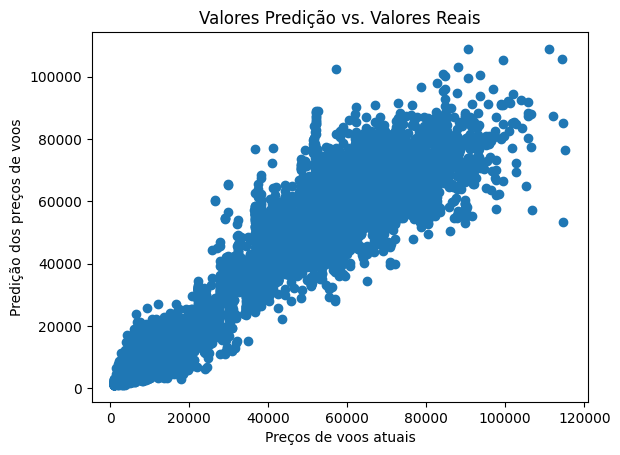

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Preços de voos atuais')
plt.ylabel('Predição dos preços de voos')
plt.title('Valores Predição vs. Valores Reais')
plt.show()

In [ ]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [ ]:
important_features_dict = {}

for idx, val in enumerate(reg.feature_importances_):
    important_features_dict[idx] = val

important_features_dict = sorted(important_features_dict, key=important_features_dict.get, reverse=True)

print(f'5 features mais importantes: {important_features_dict[:5]}')

5 features mais importantes: [1, 2, 3, 9, 5]


In [ ]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))

sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('classe_passagem', 0.8821944380047152),
 ('duration', 0.05119691618060558),
 ('days_left', 0.020628636019141236),
 ('airline_1', 0.005510686061536168),
 ('airline_5', 0.004497446468581224),
 ('source_city_2', 0.003921313687965268),
 ('dest_2', 0.0035877871366365834),
 ('source_city_5', 0.002350391027076754),
 ('dest_5', 0.00207336021553888),
 ('stops', 0.0018765107285506847),
 ('source_city_4', 0.0017751666978815157),
 ('dest_4', 0.00176714441687966),
 ('arrival_2', 0.001614204361044553),
 ('dest_3', 0.0014792601497968475),
 ('dest_0', 0.0014493970308741197),
 ('arrival_5', 0.0013116802579068697),
 ('source_city_3', 0.0012930377761968374),
 ('source_city_0', 0.0012305017730401327),
 ('departure_2', 0.0012030286306283912),
 ('departure_4', 0.0010526046888949443),
 ('arrival_0', 0.0010239501828468664),
 ('source_city_1', 0.0009386343040116477),
 ('dest_1', 0.0009117072161848535),
 ('departure_1', 0.0008836981205016246),
 ('departure_0', 0.0008835570514602332),
 ('departure_5', 0.000815

In [ ]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor( n_jobs=-1)

param_grid ={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_



NameError: name 'estimator' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0,'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
best_regressor.score(x_test, y_test)


0.9784290866997253

Desempenho do Modelo de Random Forest:
R2: 0.9753921900730314
MAE: 1497.9133461277959
MSE: 12684889.808704466
RMSE: 3561.585294318313


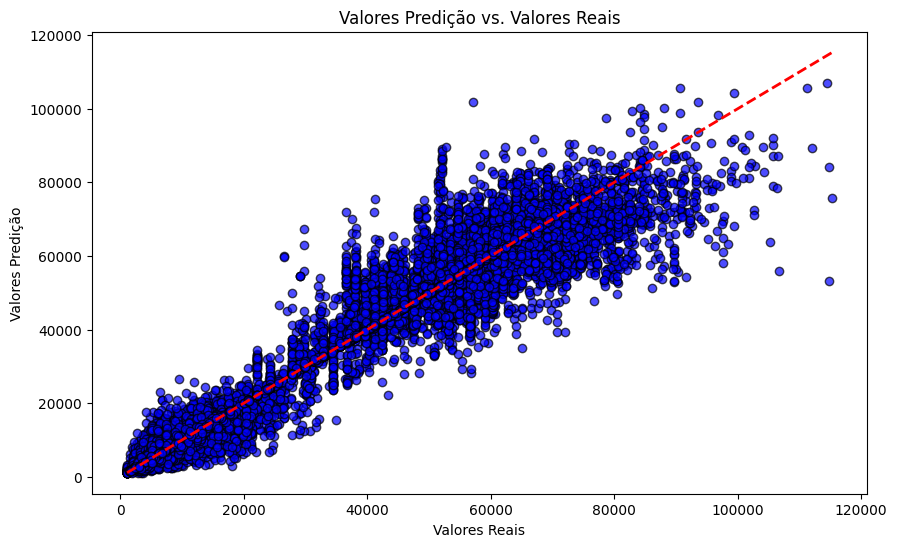

In [ ]:
# Desempenho do modelo de Random Forest
print('Desem

print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

# Plotando valores predição vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Predição')
plt.title('Valores Predição vs. Valores Reais')
plt.show()


Conclusão
O modelo de Random Forest apresentou um bom desempenho na previsão dos preços das passagens, com um R² de 0.975, MAE de 1497.91, MSE de 12684889.81, e RMSE de 3561.59. As características mais importantes identificadas foram classe_passagem, duration, e days_left, o que faz sentido dado o contexto de preços de passagens aéreas.

1. Análise de Resíduos
Após ajustar um modelo de regressão linear, é importante realizar uma análise de resíduos para verificar se as premissas do modelo estão sendo atendidas. Os resíduos são diferenças entre os valores observados e os valores preditos pelo modelo. Aqui está um exemplo de como visualizar os resíduos:

Neste gráfico:

Os pontos devem estar distribuídos aleatoriamente em torno da linha horizontal vermelha (que representa onde os resíduos são zero).
Se houver algum padrão nos resíduos (por exemplo, forma de funil), pode indicar que a relação entre variáveis não é linear ou que há heterocedasticidade nos dados.


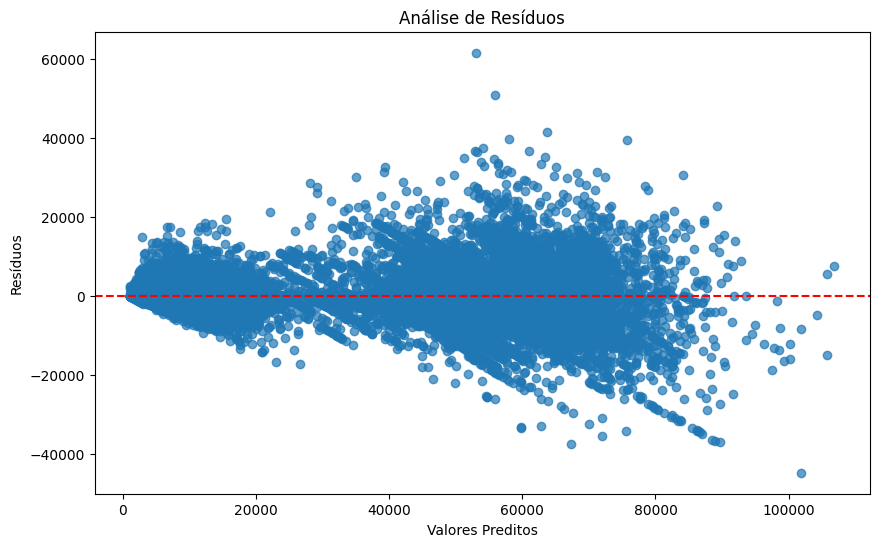

In [ ]:
# Calcular os resíduos
residuos = y_test - y_pred

# Plotar os resíduos versus os valores preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()
